## Analyzing and cleaning data

In [1]:
import pandas as pd
import numpy as np
pet_supplies = pd.read_csv('pet_supplies_2212.csv')
pet_supplies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [2]:
#find any missing values
pet_supplies.isnull().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

In [3]:
#replaced '-' to 'Unknown' in the category column
pet_supplies['category'].value_counts()
pet_supplies['category'] = pet_supplies['category'].replace('-', 'Unknow')
pet_supplies['category'].value_counts()

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
Unknow        25
Name: category, dtype: int64

In [4]:
pet_supplies['animal'].value_counts()
pet_supplies['size'].value_counts()
#size column does not have standard format

small     372
medium    233
Small     225
SMALL     157
Medium    150
large     122
MEDIUM    109
Large      75
LARGE      57
Name: size, dtype: int64

In [5]:
#formatting values from size column
pet_supplies['size'] = pet_supplies['size'].str.capitalize()
pet_supplies['size'].value_counts()

Small     754
Medium    492
Large     254
Name: size, dtype: int64

In [6]:
#converting object to float data type
pet_supplies['price'].dtypes
pet_supplies['price'] = pd.to_numeric(pet_supplies['price'], errors = 'coerce')
print(pet_supplies['price'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 1500 entries, 0 to 1499
Series name: price
Non-Null Count  Dtype  
--------------  -----  
1350 non-null   float64
dtypes: float64(1)
memory usage: 11.8 KB
None


In [7]:
print(pet_supplies['price'].dtype)
pet_supplies[pet_supplies['sales'] < 0]
pet_supplies['sales']

float64


0       1860.62
1        963.60
2        898.30
3        982.15
4        832.63
         ...   
1495    1203.36
1496    1099.97
1497     724.02
1498     658.66
1499     826.08
Name: sales, Length: 1500, dtype: float64

In [8]:
#filling missing values to '0' and converting data type from float to integer
pet_supplies['rating']
pet_supplies['rating'].value_counts()
print(pet_supplies['rating'].dtype)
pet_supplies['rating'] = pet_supplies['rating'].fillna(0)
pet_supplies['rating'].isnull().sum()
pet_supplies['rating'] = pet_supplies['rating'].astype(int)
pet_supplies['rating'].dtype

float64


dtype('int64')

In [9]:
pet_supplies['repeat_purchase'].value_counts()

1    906
0    594
Name: repeat_purchase, dtype: int64

## Data Exploration and Visualization

      product_id  category animal  ...    sales  rating  repeat_purchase
0              1      Food   Bird  ...  1860.62       7                1
2              3      Food    Dog  ...   898.30       5                1
3              4  Medicine    Cat  ...   982.15       6                1
4              5   Housing    Cat  ...   832.63       7                1
10            11      Food    Dog  ...  1457.22       7                1
...          ...       ...    ...  ...      ...     ...              ...
1490        1491  Medicine    Cat  ...   746.16       7                1
1492        1493  Medicine    Cat  ...   993.08       7                1
1493        1494   Housing   Fish  ...   535.90       3                1
1498        1499  Medicine   Fish  ...   658.66       5                1
1499        1500      Food    Cat  ...   826.08       4                1

[906 rows x 8 columns]


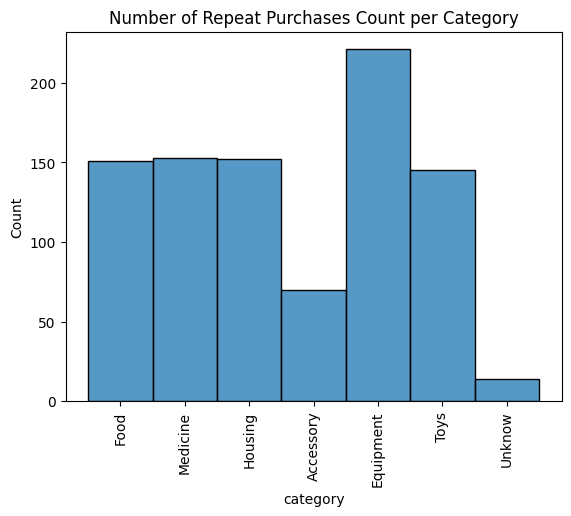

In [10]:
#visualizing the number of repeat purchases per category
import matplotlib.pyplot as plt
import seaborn as sns
pet_supplies_repeat = pet_supplies[pet_supplies['repeat_purchase'] == 1]
print(pet_supplies_repeat)
sns.histplot(x = 'category', data = pet_supplies_repeat).set(title = 'Number of Repeat Purchases Count per Category')
plt.xticks(rotation = 90)
plt.show()

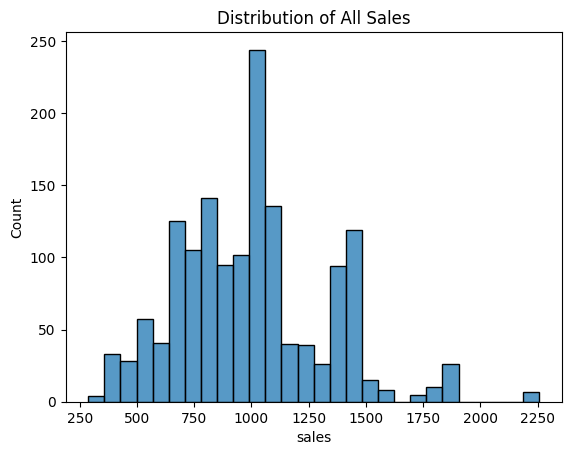

In [12]:
#visualizing the distribution of all sales
sns.histplot(data = pet_supplies, x = 'sales').set(title = 'Distribution of All Sales')
plt.show()

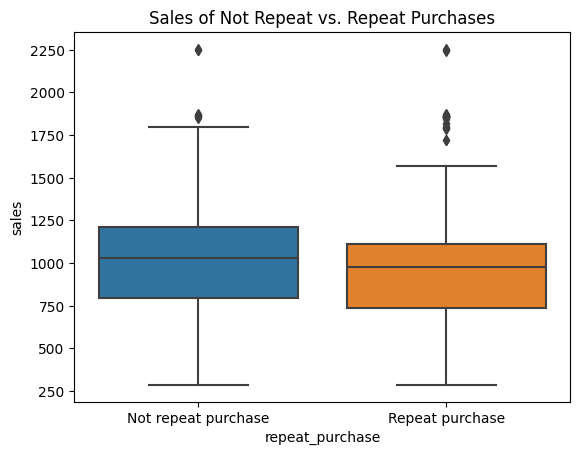

In [27]:
g = sns.boxplot(data = pet_supplies, x = 'repeat_purchase', y = 'sales')
g.set_xticklabels(['Not repeat purchase', 'Repeat purchase'])
g.set(title = 'Sales of Not Repeat vs. Repeat Purchases')
plt.show()

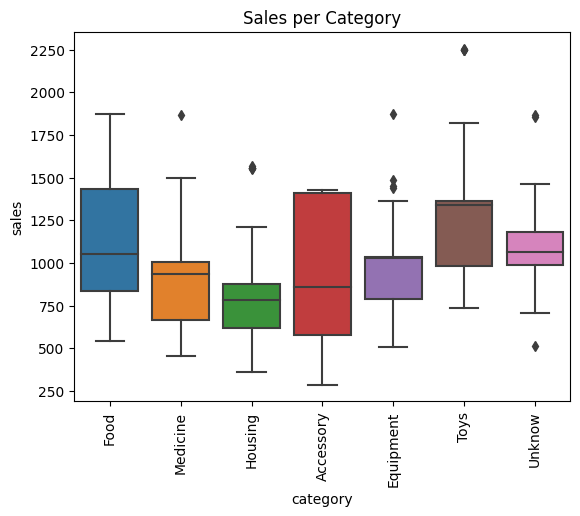

In [28]:
sns.boxplot(data = pet_supplies_repeat, x = 'category', y = 'sales').set(title = 'Sales per Category')
plt.xticks(rotation = 90)
plt.show()